In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "uk/Vehicle_Information.csv"

In [ ]:
df = pd.read_csv( csv_file_name, encoding='ISO-8859-1' )
print(df.head(25).to_string())

   Accident_Index            Age_Band_of_Driver  Age_of_Vehicle         Driver_Home_Area_Type  Driver_IMD_Decile  Engine_Capacity_.CC. Hit_Object_in_Carriageway Hit_Object_off_Carriageway     Journey_Purpose_of_Driver             Junction_Location              make                      model Propulsion_Code Sex_of_Driver Skidding_and_Overturning Towing_and_Articulation Vehicle_Leaving_Carriageway  Vehicle_Location.Restricted_Lane            Vehicle_Manoeuvre  Vehicle_Reference                          Vehicle_Type   Was_Vehicle_Left_Hand_Drive          X1st_Point_of_Impact  Year
0   200401BS00001                       26 - 35             3.0                    Urban area                4.0                1588.0                       NaN                        NaN  Data missing or out of range  Data missing or out of range             ROVER             45 CLASSIC 16V          Petrol          Male                      NaN     No tow/articulation   Did not leave carriageway               

In [ ]:
target_column_name = "X1st_Point_of_Impact"

In [ ]:
categorical_target_column = True
#categorical_target_column = False

In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 2177205
Total Number of Columns : 24


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

X1st_Point_of_Impact
Front                           1060289
Back                             410896
Offside                          305071
Nearside                         273842
Did not impact                   124336
Data missing or out of range       2771
Name: count, dtype: int64


OBSERVATION

---

There are total 2,177,205 data points in this dataset. Among which 1st point of impact in front has the highest number of occurance, 1,060,289 times.
This indicates that in the dataset the data points are not equally distributed among the classes.

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

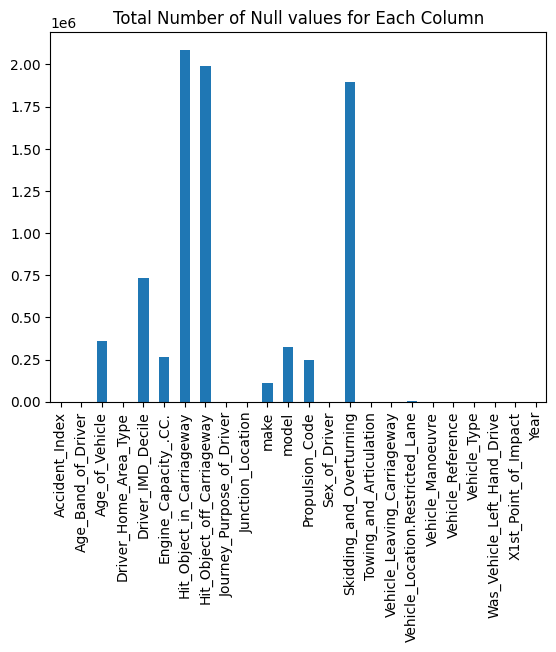

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Accident_Index                       0.000000
Age_Band_of_Driver                   0.000000
Age_of_Vehicle                      16.449944
Driver_Home_Area_Type                0.000000
Driver_IMD_Decile                   33.750244
Engine_Capacity_.CC.                12.211115
Hit_Object_in_Carriageway           95.894691
Hit_Object_off_Carriageway          91.389695
Journey_Purpose_of_Driver            0.000000
Junction_Location                    0.000000
make                                 5.091160
model                               14.942598
Propulsion_Code                     11.291679
Sex_of_Driver                        0.000000
Skidding_and_Overturning            87.185543
Towing_and_Articulation              0.000000
Vehicle_Leaving_Carriageway          0.000000
Vehicle_Location.Restricted_Lane     0.060490
Vehicle_Manoeuvre                    0.000000
Vehicle_Reference                    0.000000
Vehicle_Type                         0.000000
Was_Vehicle_Left_Hand_Drive       

OBSERVATION

---


Most of the data points from the column "Hit_Object_in_Carriageway", "Hit_Object_off_Carriageway", "Skidding_and_Overturning" are missing. These column cannot be taken in consideration for further analysis.

In [ ]:
column_names = df.columns.tolist()
accepted_columns = [
    "Age_Band_of_Driver",
    "Age_of_Vehicle",
    "Driver_Home_Area_Type",
    "Engine_Capacity_.CC.",
    "Journey_Purpose_of_Driver",
    "Junction_Location",
    "Propulsion_Code",
    "Sex_of_Driver",
    "Vehicle_Leaving_Carriageway",
    "Vehicle_Manoeuvre",
    "Vehicle_Type",
    "Vehicle_Reference",
    "Was_Vehicle_Left_Hand_Drive",
    "X1st_Point_of_Impact",
    "Year",
    ]

droped_column_names = [item for item in column_names if item not in accepted_columns]


df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 358149

------Replaced Null Values-------



C:\Users\User\AppData\Local\Temp\ipykernel_5572\351465153.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    96.914484
True      3.085516
Name: count, dtype: float64


OBSERVATION

---
There are 3% duplicate entries in this data set


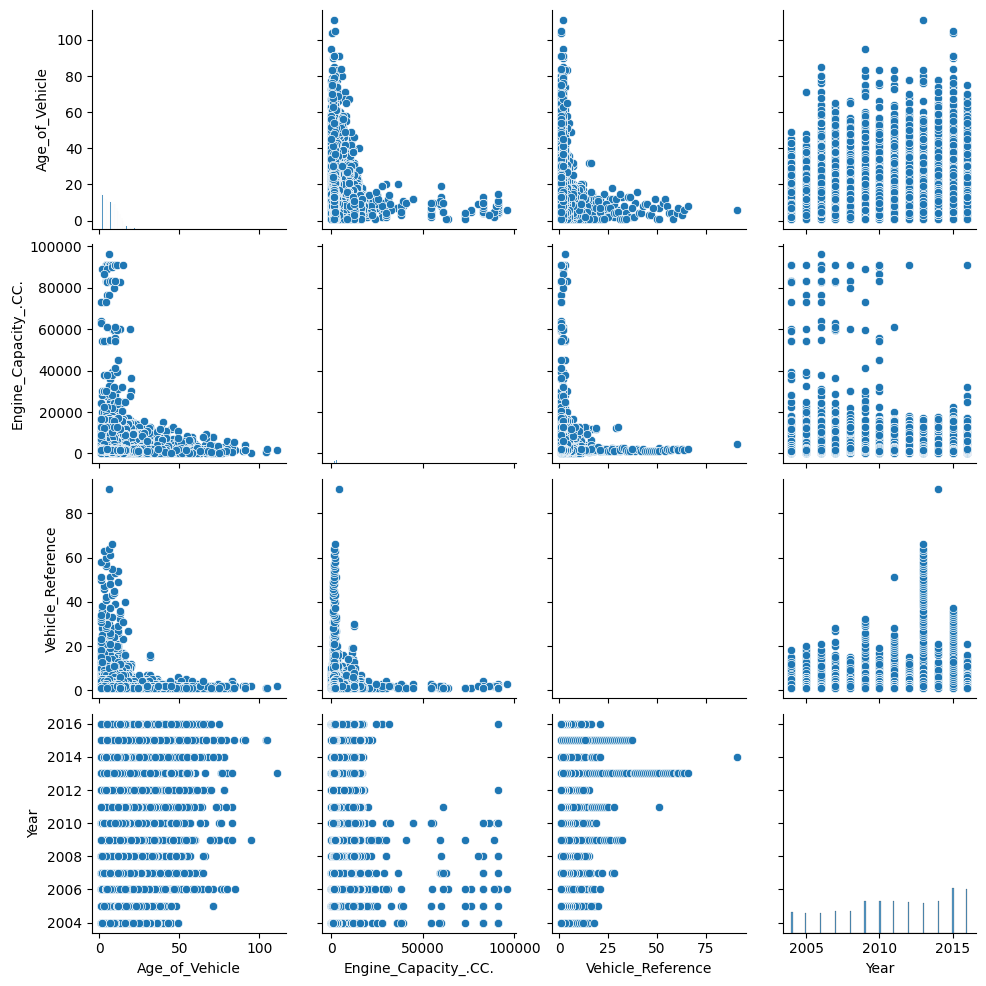

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1. There is a positive correlation between Engine Capacity (CC) and Age of Vehicle. This means that cars with larger engines tend to be older.
2. There is no clear correlation between Year and any of the other variables. This means that the year a car was made does not seem to be related to its Engine Capacity (CC), Age of Vehicle, or Vehicle Reference number. This is likely because the data set includes cars from a wide range of years, and there have been many changes in car design and technology over time.



In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Age_Band_of_Driver           object 
 1   Age_of_Vehicle               float64
 2   Driver_Home_Area_Type        object 
 3   Engine_Capacity_.CC.         float64
 4   Journey_Purpose_of_Driver    object 
 5   Junction_Location            object 
 6   Propulsion_Code              object 
 7   Sex_of_Driver                object 
 8   Vehicle_Leaving_Carriageway  object 
 9   Vehicle_Manoeuvre            object 
 10  Vehicle_Reference            int64  
 11  Vehicle_Type                 object 
 12  Was_Vehicle_Left_Hand_Drive  object 
 13  X1st_Point_of_Impact         object 
 14  Year                         int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 249.2+ MB


-----------------Unique Values per column--------------------------------




Age_Band_of_Driver               12
Age_of_Vehicle                   88
Driver_Home_Area_Type             4
Engine_Capacity_.CC.           2556
Journey_Purpose_of_Driver         8
Junction_Location                10
Propulsion_Code                  12
Sex_of_Driver                     4
Vehicle_Leaving_Carriageway      10
Vehicle_Manoeuvre                19
Vehicle_Reference                63
Vehicle_Type                     24
Was_Vehicle_Left_Hand_Drive       3
X1st_Point_of_Impact              6
Year                             13
dtype: int64

In [ ]:
categorical_columns = [
    "Age_Band_of_Driver" ,
    "Driver_Home_Area_Type",
    "Journey_Purpose_of_Driver",
    "Junction_Location",
    "Propulsion_Code" ,
    "Sex_of_Driver" ,
    "Vehicle_Leaving_Carriageway",
    "Vehicle_Manoeuvre" ,
    "Vehicle_Type" ,
    "Was_Vehicle_Left_Hand_Drive",
    "X1st_Point_of_Impact",
    "Year"
    ]
numeric_columns = [
    "Age_of_Vehicle" ,
    "Engine_Capacity_.CC.",
    "Vehicle_Reference"
    ]

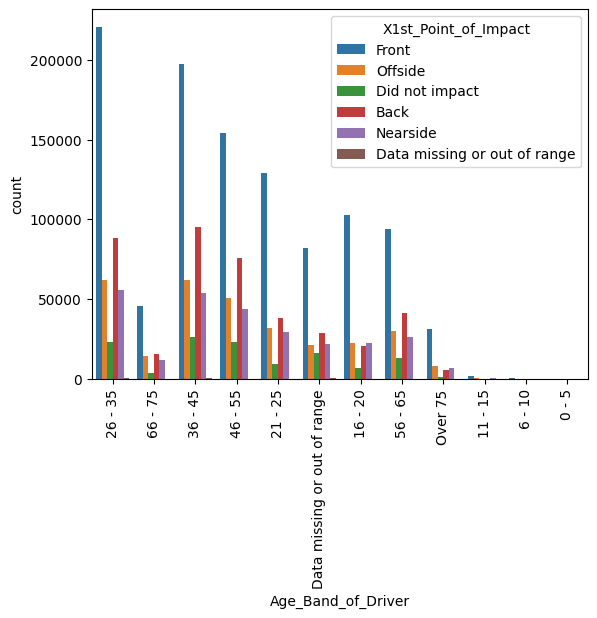

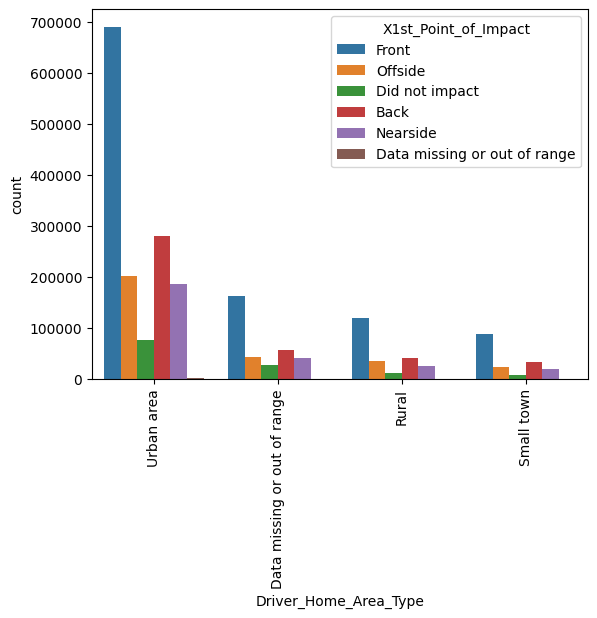

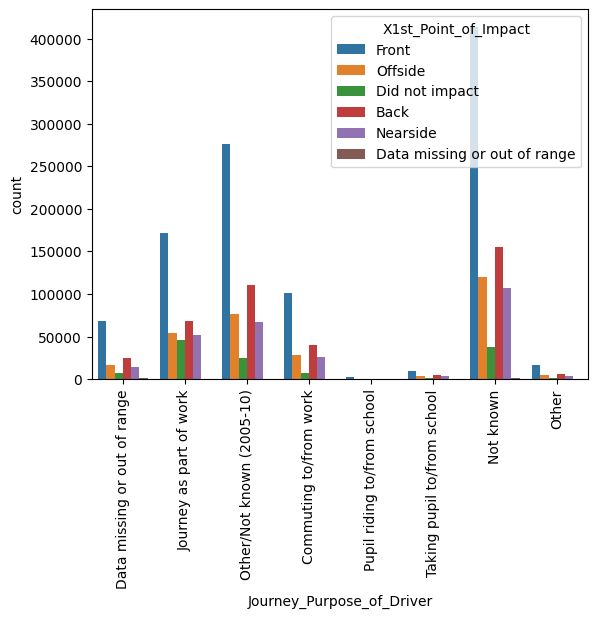

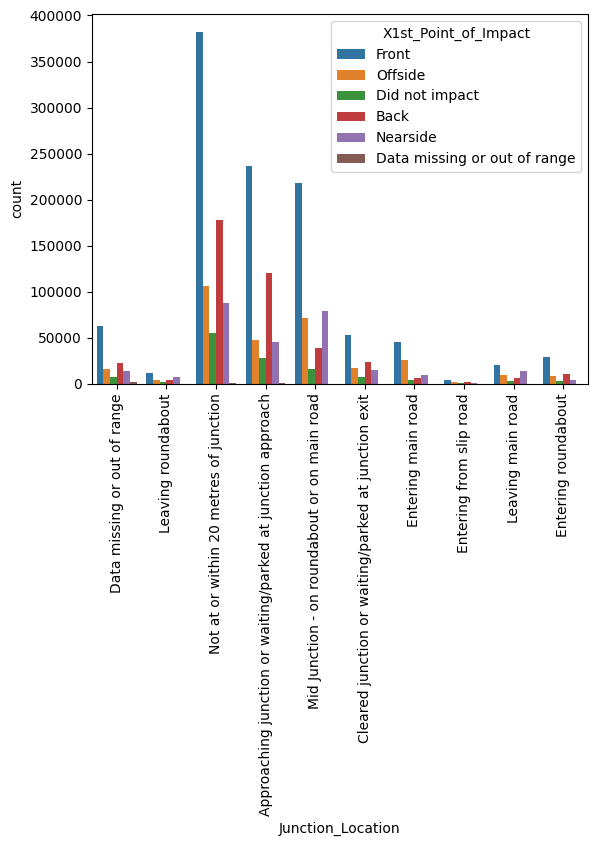

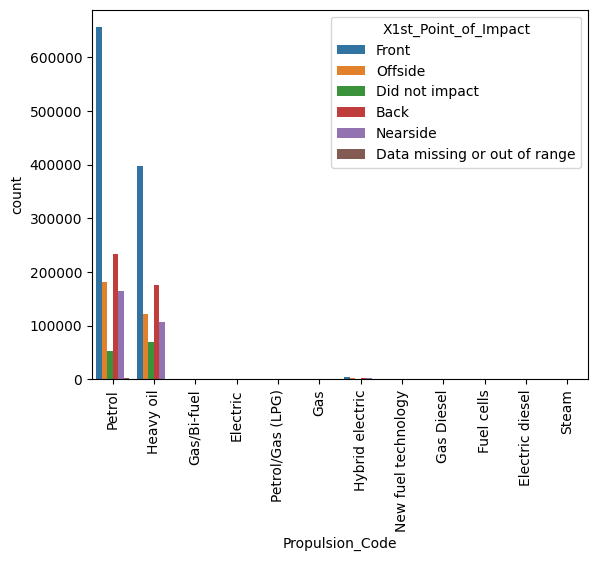

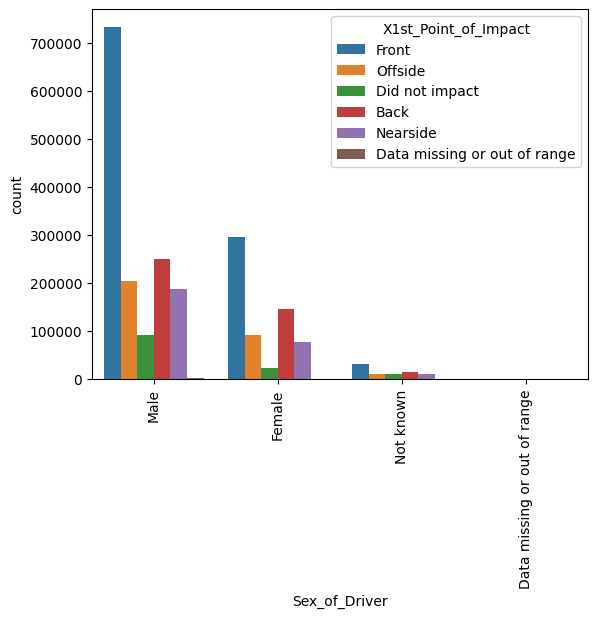

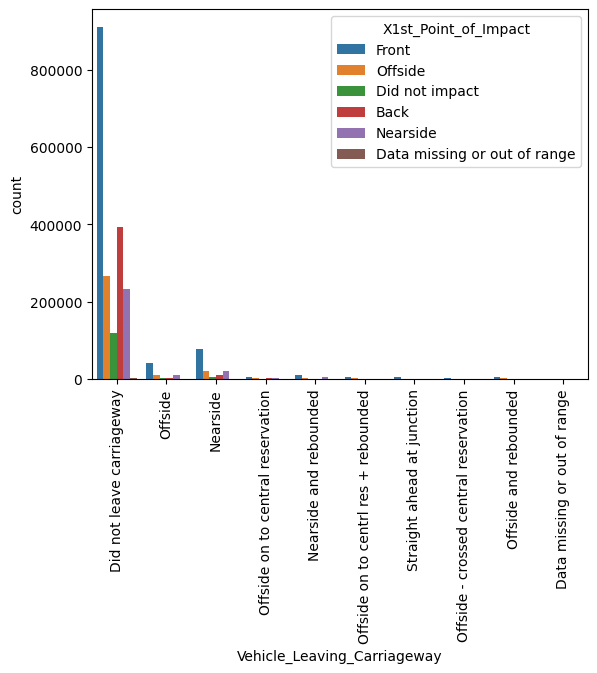

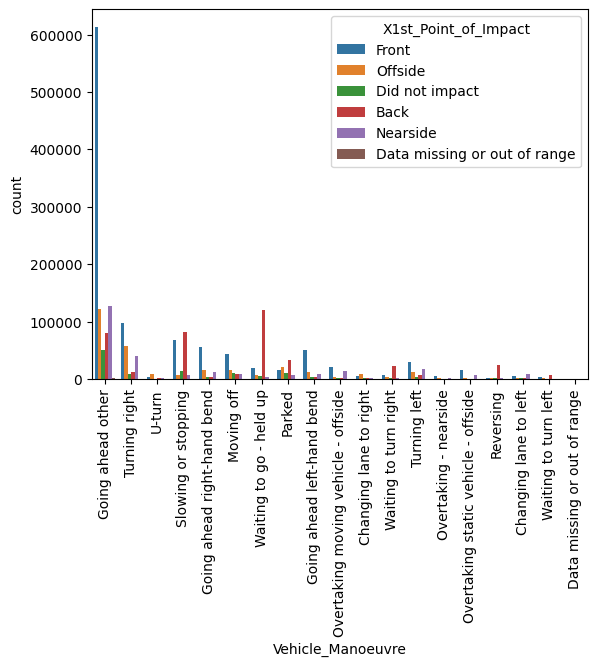

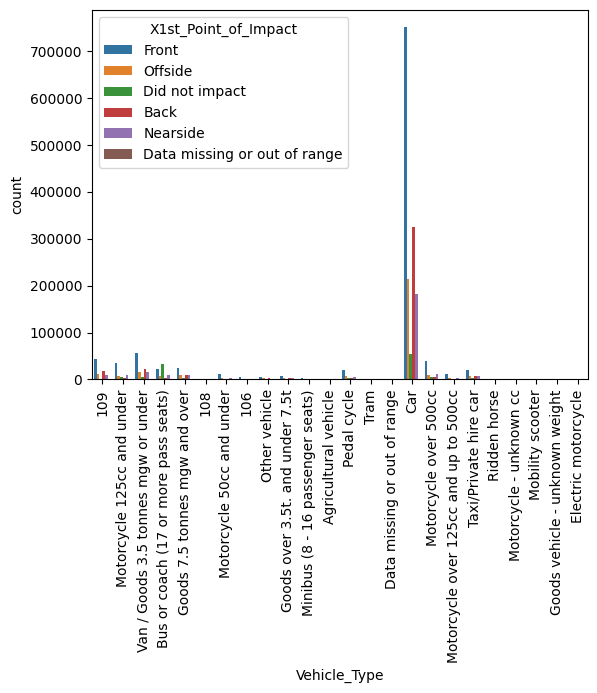

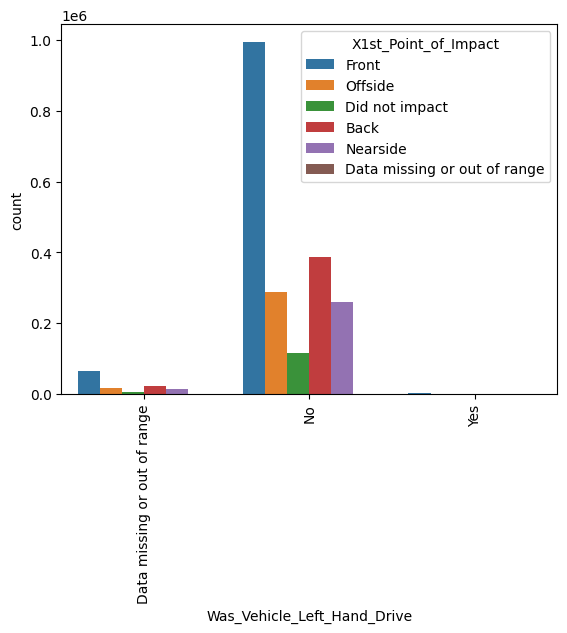

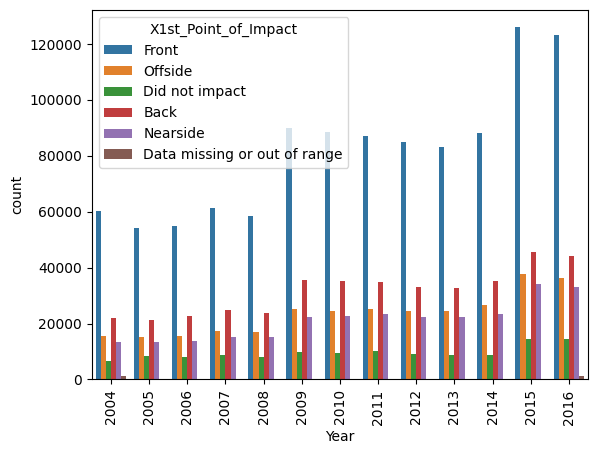

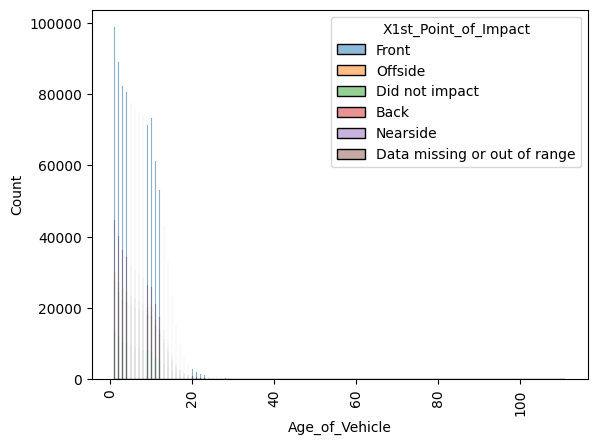

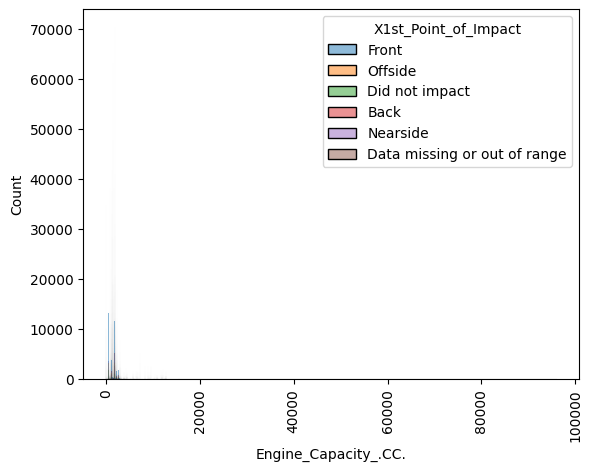

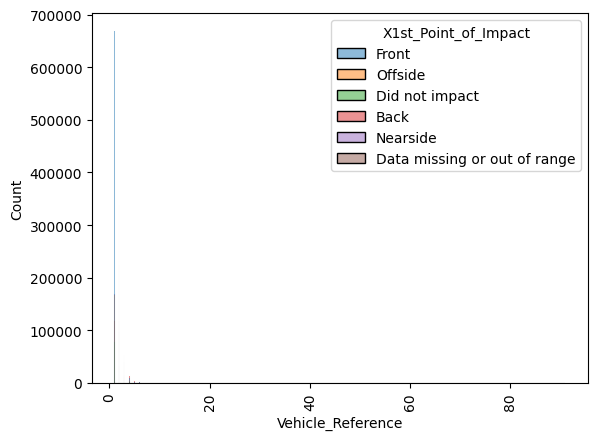

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.xticks(rotation=90)
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.xticks(rotation=90)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.xticks(rotation=90)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.xticks(rotation=90)
      plt.show()



OBSERVATION

---


1. First point of impact is mostly from front and back. Nearside and offside impact is also significant regardless of other parameters
2. Most drivers are from 21-45 age range and from urban area, journey purpose is mostly unknown. Male drivers are more in number than female drivers.
3. Not at or within 20 metres of junction, Approaching junction or waiting/parked at junction approach, Mid Junction - on roundabout or on main road is when most impacts happened.
4. Vehicle did not leave carriage by impact mostly.
5. Most vehicles are cars. First impact in front happens while trying to get ahead of others. 1st point of impact in back happens while slowing, stopping, significantly while waiting to go - held up.

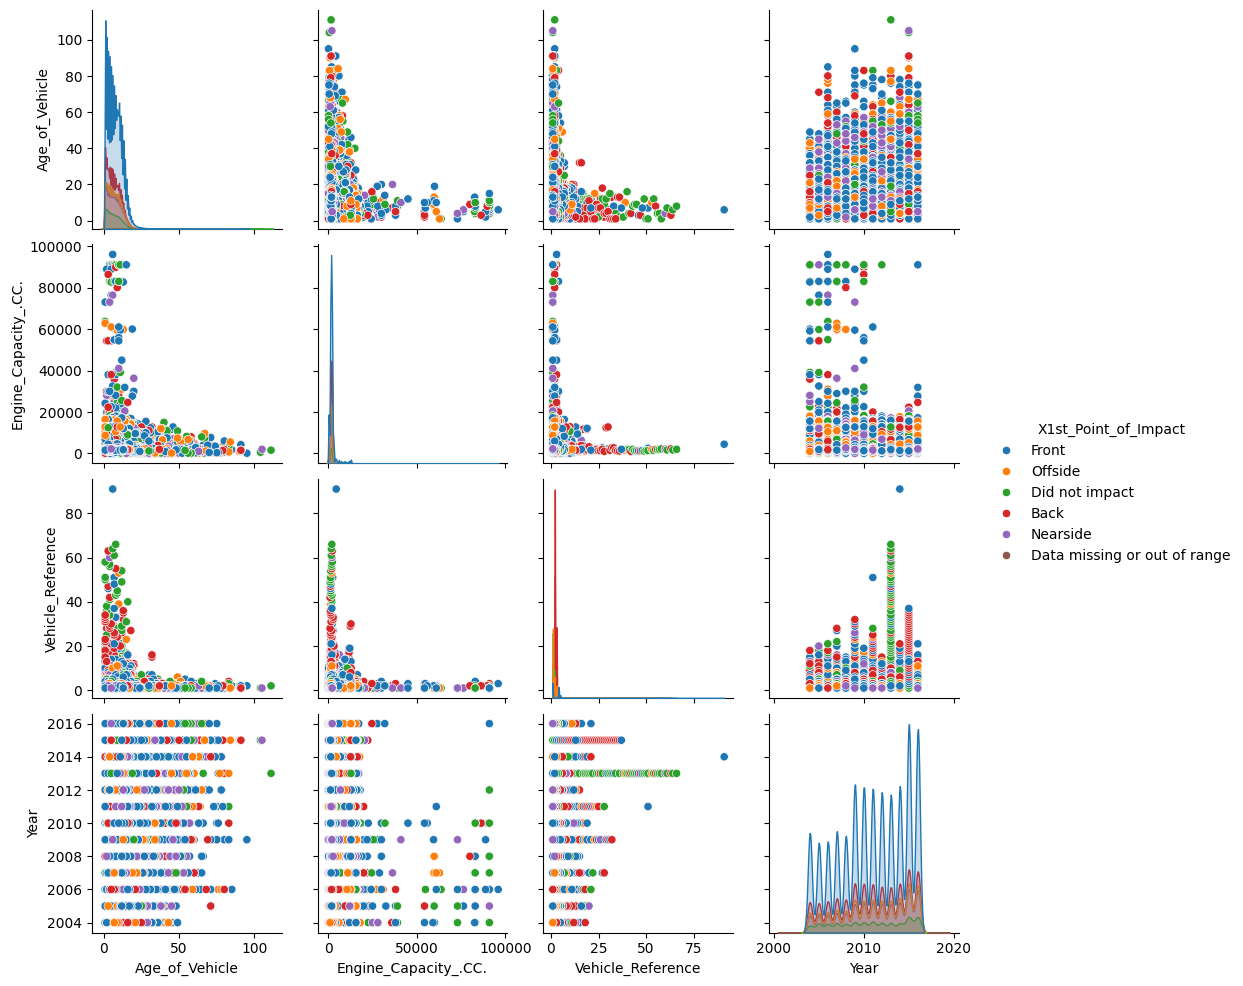

In [ ]:
if categorical_target_column:
  sns.pairplot( data=df, hue = target_column_name)

OBSERVATION

---
first point of impact has no clear tendency in any pair plots.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 15 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Age_Band_of_Driver           object 
 1   Age_of_Vehicle               float64
 2   Driver_Home_Area_Type        object 
 3   Engine_Capacity_.CC.         float64
 4   Journey_Purpose_of_Driver    object 
 5   Junction_Location            object 
 6   Propulsion_Code              object 
 7   Sex_of_Driver                object 
 8   Vehicle_Leaving_Carriageway  object 
 9   Vehicle_Manoeuvre            object 
 10  Vehicle_Reference            int64  
 11  Vehicle_Type                 object 
 12  Was_Vehicle_Left_Hand_Drive  object 
 13  X1st_Point_of_Impact         object 
 14  Year                         int64  
dtypes: float64(2), int64(2), object(11)
memory usage: 249.2+ MB


<Axes: >

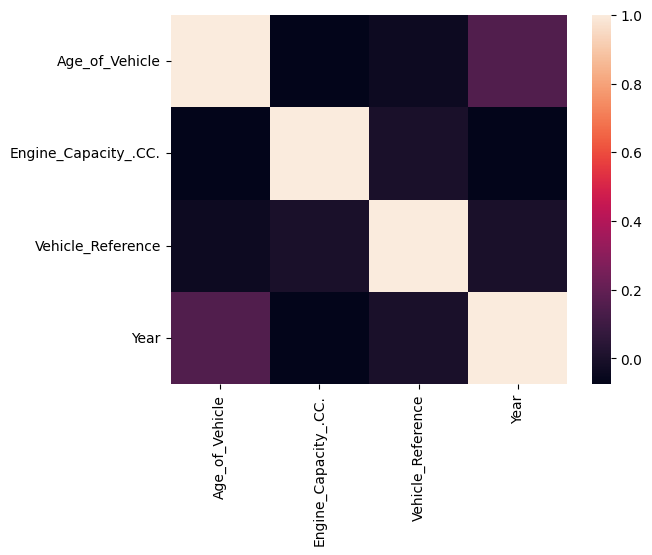

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION

---
* Strong positive correlations: Age_of_Vehicle vs. Year: This makes sense, as older vehicles will have higher year values. The correlation coefficient is likely close to 1.
* Weak correlations: Age_of_Vehicle vs. Engine_Capacity_.CC: There is a slight negative correlation, meaning older vehicles tend to have smaller engines, but the effect is weak. The correlation coefficient is likely around -0.3.

In [ ]:
sampled_df = pd.DataFrame()

# Iterate over unique categories and sample 3% of each category
for category in df[target_column_name].unique():
    category_df = df[df[target_column_name] == category]
    sampled_category_df = category_df.sample(frac=0.1, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_category_df])

print(f'Total Number of Rows : {sampled_df.shape[0]}')
print(f'Total Number of Columns : {sampled_df.shape[1]}')
print(sampled_df[target_column_name].value_counts())

Total Number of Rows : 217721
Total Number of Columns : 15
X1st_Point_of_Impact
Front                           106029
Back                             41090
Offside                          30507
Nearside                         27384
Did not impact                   12434
Data missing or out of range       277
Name: count, dtype: int64


Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = sampled_df.drop(target_column_name , axis=1 )
y =  sampled_df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.39      0.55      0.46     12422
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00      3667
           3       0.55      0.83      0.66     31709
           4       0.00      0.00      0.00      8233
           5       0.00      0.00      0.00      9192

    accuracy                           0.51     65317
   macro avg       0.16      0.23      0.19     65317
weighted avg       0.34      0.51      0.41     65317



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

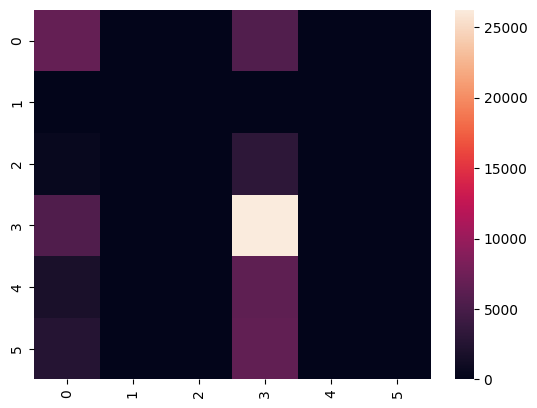

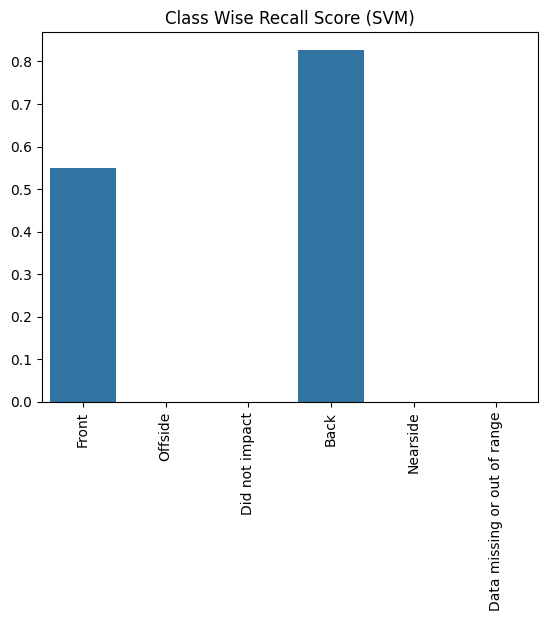

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


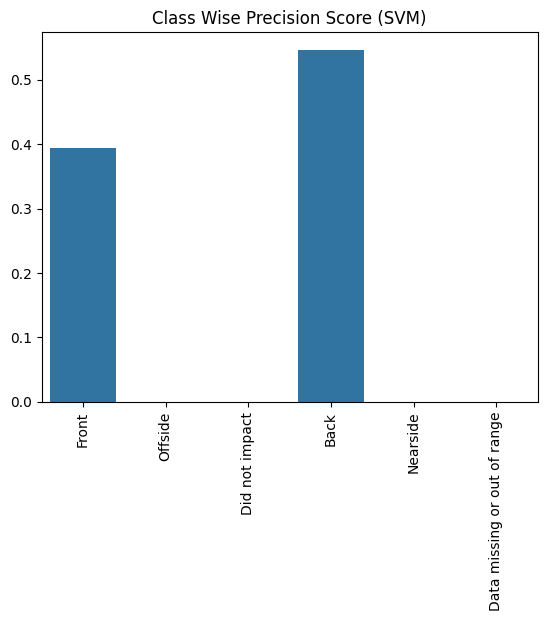

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.xticks(rotation=90)
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---

* Overall Accuracy: 51%, indicating moderate success in correct classification, but significant room for improvement.
* Severe Class Imbalance: The support values reveal a substantial imbalance, with classes 3 and 0 having significantly more instances than others.
* Poor Performance for Classes 1, 2, 4, and 5: Precision, recall, and F1-scores of 0.00 for these classes suggest major issues in classifying them correctly.
* Reasonable Performance for Class 3: Class 3 has the highest scores (precision: 0.55, recall: 0.83, F1-score: 0.66), indicating better performance.

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       0.51      0.51      0.51    123694
           1       0.23      0.27      0.25       802
           2       0.21      0.23      0.22     37237
           3       0.58      0.56      0.57    318001
           4       0.19      0.19      0.19     81748
           5       0.20      0.21      0.21     91680

    accuracy                           0.44    653162
   macro avg       0.32      0.33      0.32    653162
weighted avg       0.44      0.44      0.44    653162



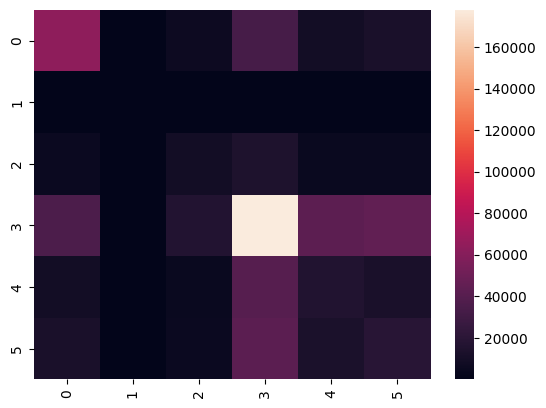

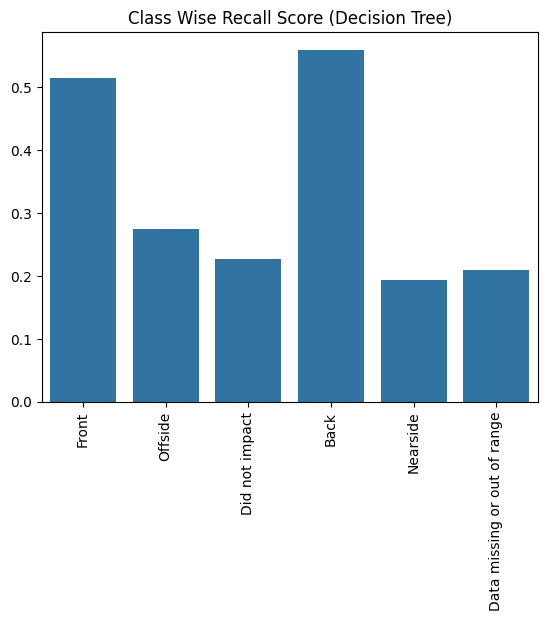

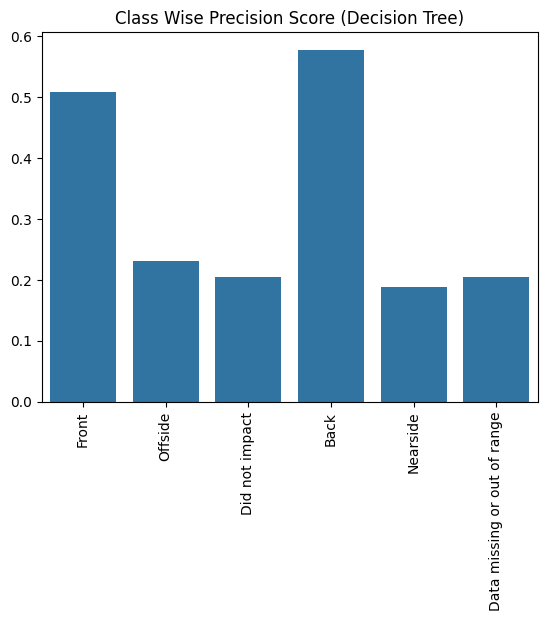

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.xticks(rotation=90)
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.xticks(rotation=90)
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---
* Overall Performance:
  - Accuracy of 0.44 indicates moderate success in correct classification, but there's room for improvement.
  - Macro average scores of 0.32 for precision, recall, and F1-score suggest a need to address class imbalance and model performance for specific classes.
  - Weighted average scores, closer to overall accuracy, are influenced by the larger support for certain classes.

* Class-Specific Performance:
  - Class 3 has the highest scores (precision: 0.58, recall: 0.56, F1-score: 0.57), suggesting better performance for this class.
  - Classes 0 and 4 have moderate scores (precision and recall around 0.51 and 0.19, respectively).
  - Classes 1, 2, and 5 have noticeably lower scores, indicating issues in classifying them accurately.

* Class Imbalance:
  - Significant imbalance exists, with class 3 having the most instances and classes 1 and 5 having considerably fewer.

